In [202]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [203]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [320]:
sample = df["Resume"][4]
sample

'Education Details MCA YMCAUST Faridabad Haryana Data Science internship Skill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description '

In [321]:
df.shape

(962, 2)

In [322]:
df['Category'].unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

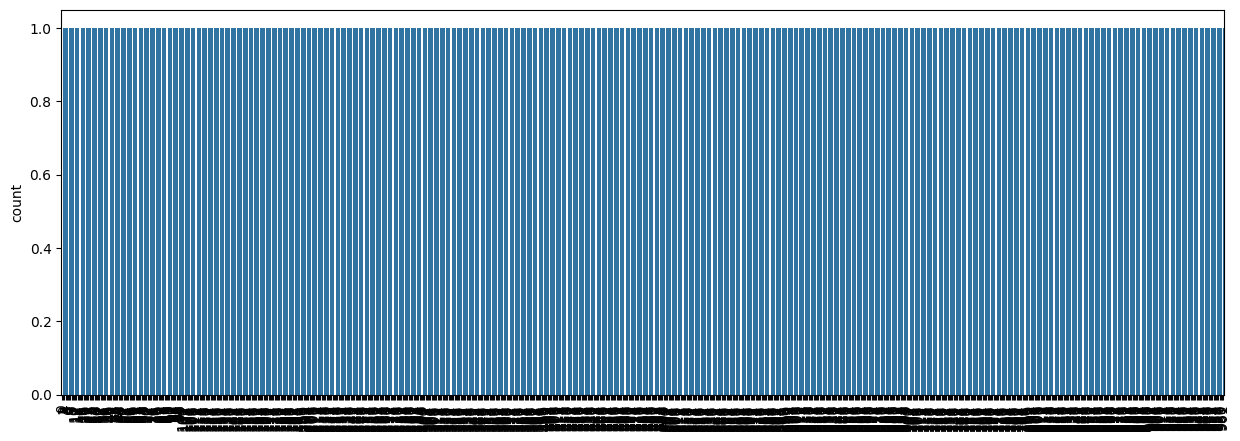

In [323]:
plt.figure(figsize=(15,5))
sns.countplot(df["Category"])
plt.xticks(rotation=90)
plt.show()

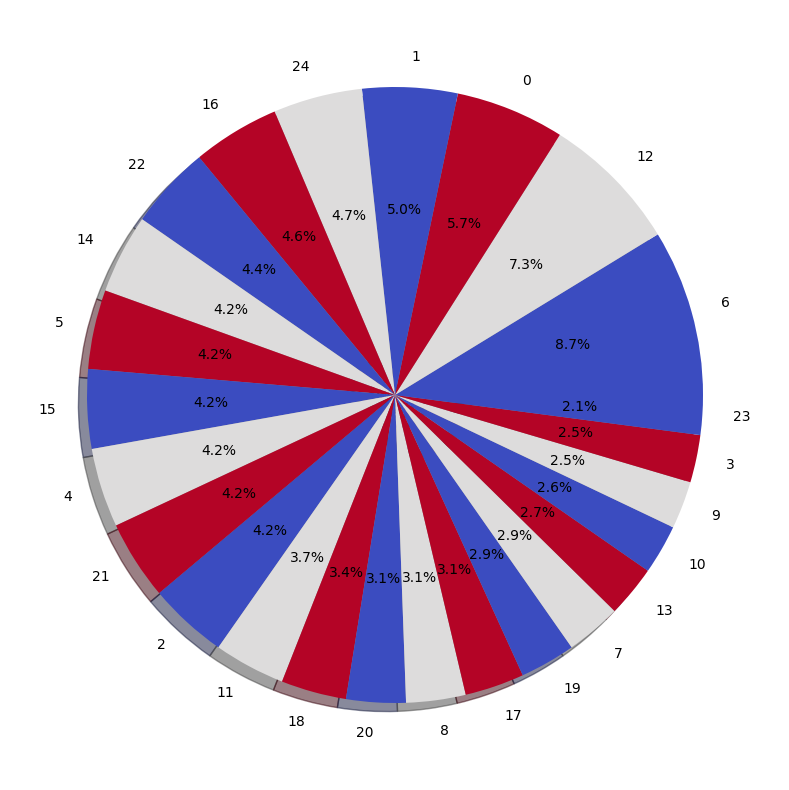

In [324]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct="%1.1f%%",shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [325]:
import re
def cleanResume(txt):
    cleaned_text = re.sub(r'http\S+\s', ' ', txt)
    cleaned_text = re.sub(r'RT|cc', ' ', cleaned_text)
    cleaned_text = re.sub(r'#\S+\s', ' ', cleaned_text)
    cleaned_text = re.sub(r'@\S+', ' ', cleaned_text)
    special_characters = re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")
    pattern = rf"[{special_characters}]"
    cleaned_text = re.sub(pattern, ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    cleaned_text = re.sub('[^\x00-\x7f]', ' ', cleaned_text)
    return cleaned_text

In [326]:
result = cleanResume("My ##$ portfolio website is like this: http://blog.com and view it at @mydomain")
result

'My portfolio website is like this and view it at '

In [327]:
df["Resume"] = df["Resume"].apply(lambda x: cleanResume(x))

In [328]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

For transforming the resume types from string to integers

In [329]:
le.fit(df["Category"])
df["Category"] = le.transform(df["Category"])

For converting to word vectors

In [330]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df["Resume"])
requiredText = tfidf.transform(df["Resume"])

splitting the code for training and testing purposes

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df["Category"], test_size=0.2, random_state=42)

In [332]:
X_train.shape

(769, 7351)

In [333]:
X_test.shape

(193, 7351)

Prediction

In [334]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [335]:
print(f"The accuracy of the model is {accuracy_score(y_test,ypred)}")

The accuracy of the model is 0.9844559585492227


In [336]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [339]:
myResume = df["Resume"][4]
print(myResume)

Education Details MCA YMCAUST Faridabad Haryana Data Science internship Skill Details Data Structure Exprience Less than 1 year months C Exprience Less than 1 year months Data Analysis Exprience Less than 1 year months Python Exprience Less than 1 year months Core Java Exprience Less than 1 year months Database Management Exprience Less than 1 year monthsCompany Details company Itechpower description 


In [340]:
import pickle

clf = pickle.load(open('clf.pkl','rb'))

cleant_resume = cleanResume(myResume)
input_features = tfidf.transform([cleant_resume])
#print(input_features)
prediction_id = clf.predict(input_features)[0]
print(prediction_id)

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8 : "Devops Engineer",
    20 : "Python Developer",
    24: "Web Designer",
    12 : "HR",
    13: "Hadoop",
    3 : "Blockchain",
    10:"ETL Developer",
    18: "Operations Manager",
    6 : "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1:"Art",
    7:"Database",
    8:"Electric Engineer",
    14:"Health and Fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"dotnet developer",
    2:"Automation tester",
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    0:"Advocate"
}

category_name = category_mapping.get(prediction_id,"unknown")
print(f"The category is {category_name}")
print(f"The prediction id is {prediction_id}")

6
The category is Data Science
The prediction id is 6
